<a href="https://colab.research.google.com/github/lmlouis/IntroductionIA/blob/main/association_rules.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Objective**
Association Rules

Imaginons que vous soyez un ingénieur en apprentissage automatique travaillant pour une entreprise de vêtements et que vous souhaitiez adopter de nouvelles stratégies pour améliorer les bénéfices de l'entreprise.

Utilisez cet dataset et l'extraction de règles d'association pour trouver de nouveaux plans de marketing. 

Notez que l'une des stratégies peut être basée sur les éléments qui doivent être réunis
```
dataset = [['Skirt', 'Sneakers', 'Scarf', 'Pants', 'Hat'],

    ['Sunglasses', 'Skirt', 'Sneakers', 'Pants', 'Hat'],

    ['Dress', 'Sandals', 'Scarf', 'Pants', 'Heels'],

    ['Dress', 'Necklace', 'Earrings', 'Scarf', 'Hat', 'Heels', 'Hat'],

   ['Earrings', 'Skirt', 'Skirt', 'Scarf', 'Shirt', 'Pants']]

```
Bonus : Essayez de faire un peu de visualisation avant d'appliquer l'algorithme d'Apriori.

Faisons le même point de contrôle mais avec un plus grand ensemble de données !

# Le dataset

Le dataset présente des transactions d'articles d'un magasin de vetêments sous forme de maticce d'items qui se repetent avec une fréquence données.


In [1]:
dataset = [
    ['Skirt', 'Sneakers', 'Scarf', 'Pants', 'Hat'],

    ['Sunglasses', 'Skirt', 'Sneakers', 'Pants', 'Hat'],

    ['Dress', 'Sandals', 'Scarf', 'Pants', 'Heels'],

    ['Dress', 'Necklace', 'Earrings', 'Scarf', 'Hat', 'Heels', 'Hat'],

   ['Earrings', 'Skirt', 'Skirt', 'Scarf', 'Shirt', 'Pants']
   ]

# Apriori Preparation

Afin d'utiliser la fonction apriori, nous devons transformer notre jeu de données en un DataFrame encodé avec la methode **one-hot**.
 
Transaction Encoder crée un tableau NumPy à partir d'une liste et le "one-hot" et l'encode (mais dans un format **True/False** et non en des 1 et des 0).

In [2]:
import mlxtend
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
transaction_encoder=TransactionEncoder()
arrray_transaction_encoder=transaction_encoder.fit(dataset).transform(dataset)    
dataframe=pd.DataFrame(arrray_transaction_encoder, columns=transaction_encoder.columns_)  
dataframe

,Dress,Earrings,Hat,Heels,Necklace,Pants,Sandals,Scarf,Shirt,Skirt,Sneakers,Sunglasses
0,False,False,True,False,False,True,False,True,False,True,True,False
1,False,False,True,False,False,True,False,False,False,True,True,True
2,True,False,False,True,False,True,True,True,False,False,False,False
3,True,True,True,True,True,False,False,True,False,False,False,False
4,False,True,False,False,False,True,False,True,True,True,False,False


# Data Analyse

importer les librairies dont on aura besoin

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np





Quel est le nombre total de transactions ?

In [4]:
Total_Transactions = int(dataframe.shape[0])
Total_Transactions

5

Quels les noms des items ?

In [5]:
items = list(dataframe.columns)
items

['Dress',
 'Earrings',
 'Hat',
 'Heels',
 'Necklace',
 'Pants',
 'Sandals',
 'Scarf',
 'Shirt',
 'Skirt',
 'Sneakers',
 'Sunglasses']

les articles sont :

**Dress** : Robe

**Earrings**: Boucles d'oreilles

**Hat**:  Chapeau

**Heels** : Talons

**Necklace** :  Collier

**Pants** :  Pantalon

**Sandals** : Sandales

**Scarf** : Echarpe

**Shirt** : Chemise

**Skirt** : Jupe

**Sneakers** : Baskets

**Sunglasses** : Lunettes de soleil

L'objectif de cette analyse est d'utdier les affinités entre les articles à travers les 5 transaction enrégistrés










 
 
 




Décrivons le comportement des articles dans le dataframe

In [6]:
desciption_items = dataframe.describe()
desciption_items

,Dress,Earrings,Hat,Heels,Necklace,Pants,Sandals,Scarf,Shirt,Skirt,Sneakers,Sunglasses
count,5,5,5,5,5,5,5,5,5,5,5,5
unique,2,2,2,2,2,2,2,2,2,2,2,2
top,False,False,True,False,False,True,False,True,False,True,False,False
freq,3,3,3,3,4,4,4,4,4,3,3,4


l'item scandals

**count** =  5 : on a 5 transactions

**top** = False: l'item scandals n'est pas la variable qui occure le plus dans dans une transaction.

**unique**=2 : on a que deux 2 items qui ont été utilisé qu'une fois au cours des différentes transactions à savoir scandals et Sunglasses

**freq**=4 : elle n'apparait pas dans 4 transactions sur 5.



Intéressons nous maintenant aux fréquences transactionnelles de nos articles :

Quelles sont les fréquences des items?

In [7]:
dictionnaire_transation = {k:0 for k in items}
for item in items:
  for i in  range(Total_Transactions):
    if(dataframe.iloc[i][item] == True):
      dictionnaire_transation[item] +=1
dictionnaire_transation

{'Dress': 2,
 'Earrings': 2,
 'Hat': 3,
 'Heels': 2,
 'Necklace': 1,
 'Pants': 4,
 'Sandals': 1,
 'Scarf': 4,
 'Shirt': 1,
 'Skirt': 3,
 'Sneakers': 2,
 'Sunglasses': 1}

dictionnaire_transation présente un dictionnaire de correspondance entre les articles et leurs occurences dans l'ensemble des transaction.

Ainsi on peut voir que l'article Dress (robe) a été vendu 2 fois au cours des 5 transactions.

pour une meilleur utilisation mettons ce dictionnaire sous le format d'un dataframe

In [8]:
frequence = pd.DataFrame(dictionnaire_transation,index=range(1)) 
frequence

,Dress,Earrings,Hat,Heels,Necklace,Pants,Sandals,Scarf,Shirt,Skirt,Sneakers,Sunglasses
0,2,2,3,2,1,4,1,4,1,3,2,1


Qui sont les items les plus fréquents ?

On a créer un dataframe qui présente les items ainsi que leur frequences avec un filtrage descendant.

In [9]:
df = pd.DataFrame()
df['items'] = frequence.columns
df['frequences'] = frequence.T.values
df = df.sort_values(by='frequences', ascending=False)
df.head()

,items,frequences
5,Pants,4
7,Scarf,4
2,Hat,3
9,Skirt,3
0,Dress,2




Visualisons maintenant les articles les plus fréquents

Text(0.5, 1.0, 'Les articles les plus fréquents')

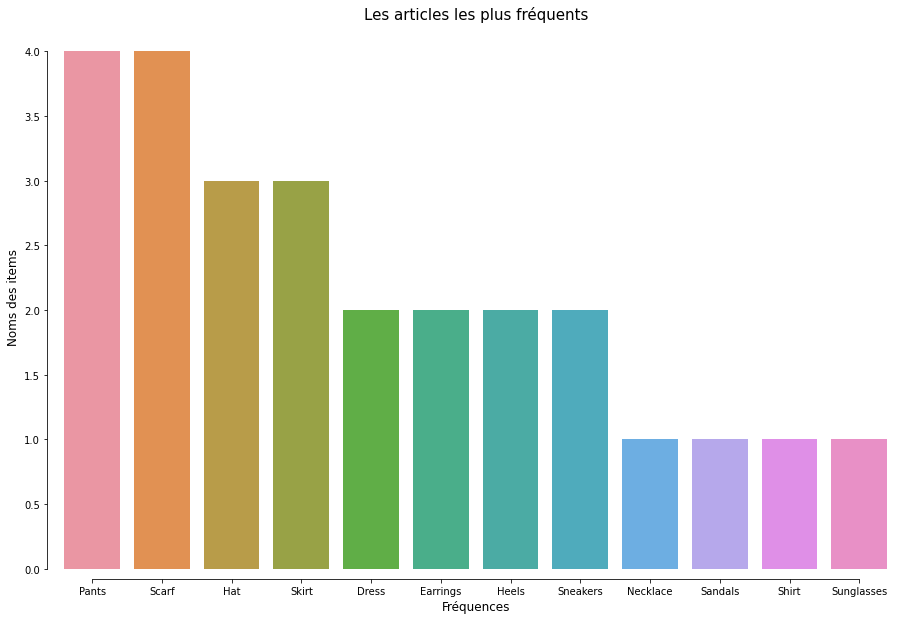

In [10]:
f, ax = plt.subplots(figsize =(15, 10))
sns.barplot(data=df, x='items',y='frequences')
sns.despine(offset=10, trim=True);
ax.set_xlabel('Fréquences', fontsize=12)
ax.set_ylabel('Noms des items', fontsize=12)
ax.set_title('Les articles les plus fréquents', fontsize=15)

* En Tête on a les articles Pants et Scarf qui occurent : **4**x
* Suivit de Skirt et Hat: **3**x
* puis Dress, Earnings, Heels et Sneakers : **3**x
* Et enfin Necklace, Scandals, shirt et Sungclasses : **1**x 

Ainsi au cours des transactions les articles les plus demandés sont des **Pantalons** et  des **Echarpes**.

## Plot with squarify
**Objectif** :

* Pour afficher le modèle de distribution des transactions à travers chaque niveau de catégories dans la hiérarchie.

* Pour afficher les items en utilisant la taille et le code couleur.

Pour ce faire il faut d'abord installer la bibliothèque **squarify**.

In [11]:
pip install squarify

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Un diagramme **Treemap** est un type de visualisation approprié lorsque l'ensemble de données est structuré dans un ordre hiérarchique avec une disposition arborescente avec des racines, des branches et des nœuds. Il nous permet d'afficher des informations sur une quantité importante de données de manière très efficace dans un espace limité. 

L'argument alpha permet de faire varier l'opacité de l'image

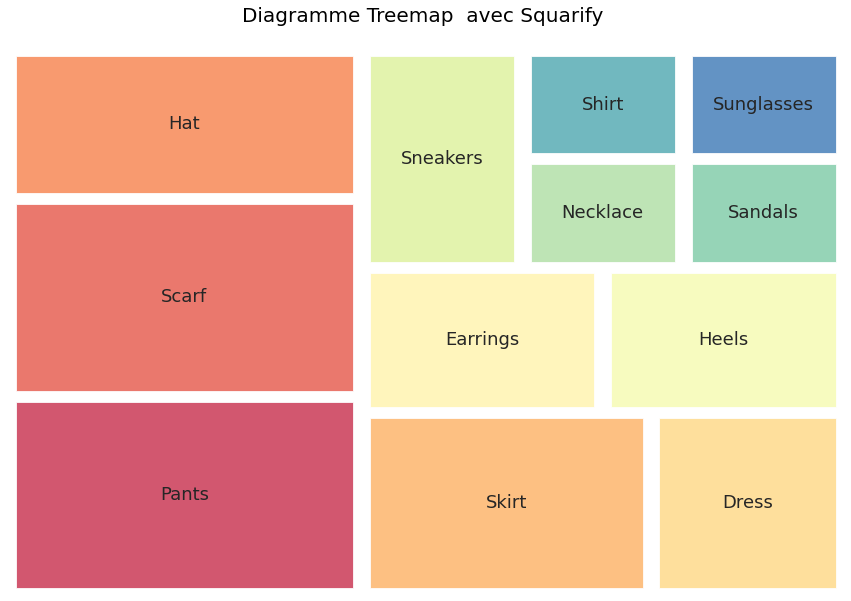

In [12]:
import squarify
f, ax = plt.subplots(figsize =(15, 10))
sns.set_style(style="whitegrid")
sizes=df['frequences']
label=df['items']
squarify.plot(sizes=sizes, 
              label=label, 
              alpha=0.8,
              color=sns.color_palette("Spectral", 
                                     len(df)),
               pad=1,
               text_kwargs={'fontsize': 18}
              )
ax.set_title('Diagramme Treemap  avec Squarify \n', fontsize=20)

plt.axis('off')
plt.show()

Notre **Treemap** nous permet de voir la hiéarchie ainsi que des associations par affinité entres les différentes catégorie d'articles.

**vêtements** : Robe, Chemise , Pantalon, Jupe

**chaussures** :Talons, Sandales, Baskets

**accessoires** : Boucles d'oreilles, Chapeau, Collier, Echarpe, Lunettes de soleil

* Une association des accessoires et de chaussures tels que **Earning** et **Heels** sont proches l'une de l'autre est très appréciable.

* Une association des accessoires et de vêtement et de chaussures tels que **shirt**, **necklace**, **scandal**, **Sunglass** sont très proches.
* Une association des accessoires et de vêtement tels que **Hat**, **Scarf**, **Pants** est aussi très intérressant.
* une association de vetêments : **Skirt**, **Dress** est appréciable


## Graph networkx
Networkx va nous permetre de génerer des topologies de réseau dans le but de voir la rélation en les **Noeuds** (entiers) et les arretes (catégorique) en implémentant notre stucture de données hiéarchisé qui est le dataframe frequence 

**nodes ou noeud** : répresentent les articles ou items 

**edges ou arrêtes** : fréquence des articles 

In [13]:

pip install networkx

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [14]:
import networkx as nx

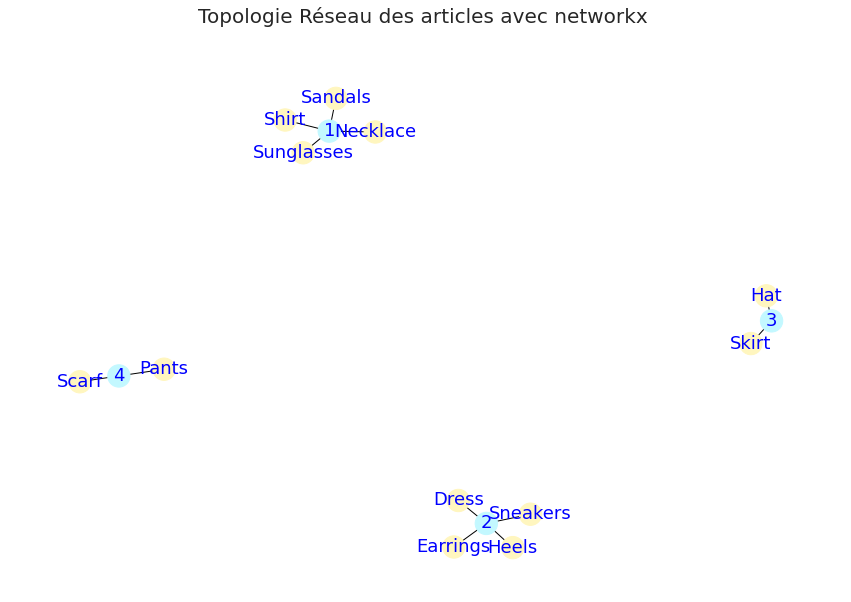

In [17]:
f, ax = plt.subplots(figsize =(15, 10))
G = nx.from_pandas_edgelist(df, 'items', 'frequences')
colors=[
        '#C3F8FF',
        '#ABD9FF',
        '#FFF6BF',
        '#FFEBAD',
        ]
color_map = []
for node in G:
    if node in list(df.frequences):
      color_map.append(colors[0])
    else: 
        color_map.append(colors[2])      
nx.draw(G, 
        node_color=color_map, 
        with_labels=True, 
        font_size=18,
        font_color='b',
        node_size=500,
        arrowsize = 50,
        )
ax.set_title('Topologie Réseau des articles avec networkx \n', fontsize=20)
plt.show()

on obtien des affinité suivantes :

* Dress, Sneakers , Earnings, heels appartiennent au même réseau 

* skirt, hat appartiennent au même réseau 

* scarf et pants appartiennent au même réseau  

* scandal, Necklace, Sunglasses , shirt appartiennent au même réseau 



## Correlation entre les items 

Etudions de plus près la correlation entre les variables 

In [16]:
dataframe.corr()

,Dress,Earrings,Hat,Heels,Necklace,Pants,Sandals,Scarf,Shirt,Skirt,Sneakers,Sunglasses
Dress,1.000000,0.166667,-0.166667,1.000000,0.612372,-0.612372,0.612372,0.408248,-0.408248,-1.000000,-0.666667,-0.408248
Earrings,0.166667,1.000000,-0.166667,0.166667,0.612372,-0.612372,-0.408248,0.408248,0.612372,-0.166667,-0.666667,-0.408248
Hat,-0.166667,-0.166667,1.000000,-0.166667,0.408248,-0.408248,-0.612372,-0.408248,-0.612372,0.166667,0.666667,0.408248
Heels,1.000000,0.166667,-0.166667,1.000000,0.612372,-0.612372,0.612372,0.408248,-0.408248,-1.000000,-0.666667,-0.408248
Necklace,0.612372,0.612372,0.408248,0.612372,1.000000,-1.000000,-0.250000,0.250000,-0.250000,-0.612372,-0.408248,-0.250000
Pants,-0.612372,-0.612372,-0.408248,-0.612372,-1.000000,1.000000,0.250000,-0.250000,0.250000,0.612372,0.408248,0.250000
Sandals,0.612372,-0.408248,-0.612372,0.612372,-0.250000,0.250000,1.000000,0.250000,-0.250000,-0.612372,-0.408248,-0.250000
Scarf,0.408248,0.408248,-0.408248,0.408248,0.250000,-0.250000,0.250000,1.000000,0.250000,-0.408248,-0.612372,-1.000000
Shirt,-0.408248,0.612372,-0.612372,-0.408248,-0.250000,0.250000,-0.250000,0.250000,1.000000,0.408248,-0.408248,-0.250000
Skirt,-1.000000,-0.166667,0.166667,-1.000000,-0.612372,0.612372,-0.612372,-0.408248,0.408248,1.000000,0.666667,0.408248


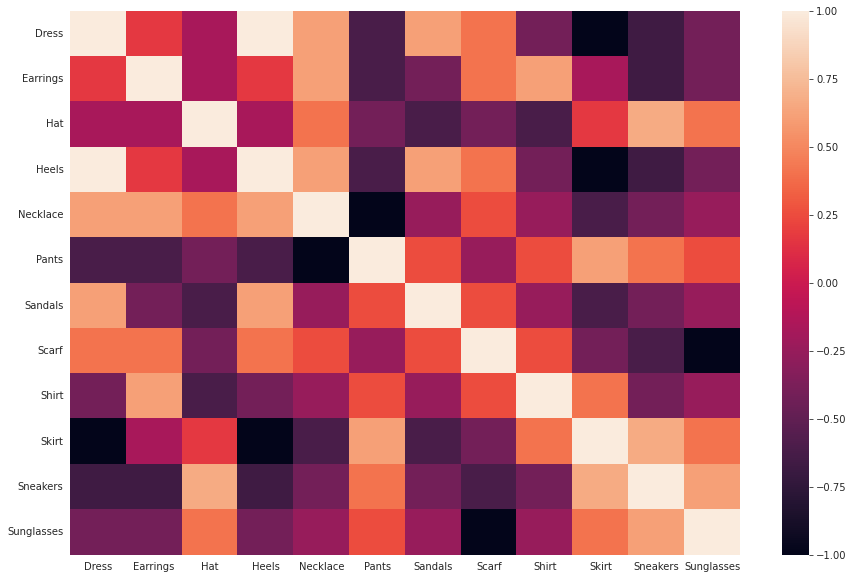

In [18]:
f, ax = plt.subplots(figsize =(15, 10))
sns.heatmap(dataframe.corr())

**Correlation**:

Dress et Heels ont une forte correlation qui est de 1. 

Une dame qui cherche une robe pourrait vouloir aussi des talons.



## Recape 

Le dataset présent les données catégorielles representant des articles de  vêtements de magasins au cours de différentes transactions.

on peut diviser ses données en catégories suivantes 
* **vêtements** : Robe, Chemise , Pantalon, Jupe

* **chaussures** :Talons, Sandales, Baskets

* **accessoires** : Boucles d'oreilles, Chapeau, Collier, Echarpe, Lunettes de soleil

Il ya une forte affinité :

* Entre les **vêtements** et **chaussures** : Quelqu'un qui recherche une sneaker pourrait aussi avoir bésoin d'une chemise.

* Entre les **vêtement**  et **accéssoire** : Quelqu'un qui cherche un pantalon serait peut-être ravi de trouver une écharpe qui va avec.

* Entre les **vêtement**  et **vêtement** : les pantalon, roble, chemises vendu en packs pourraient intérresser les dames.

* Entre les **chaussures**  et **chaussures** :
les sneakers et Talons vendu en packs pourraient intérresser les dames.

* Entre les **chaussures**  et **accéssoire** : des lunnettes de soleils assortient à sa sneakers serait un bon achat.
* Une association des accessoires et de vêtement et de chaussures tels que **shirt**, **necklace**, **scandal**, **Sunglass** sont très proches.

# Support Code
Sélectionnons des  ensembles d'éléments (itemsets)  avec un minimum de 60 % de **support**.

In [19]:
from mlxtend.frequent_patterns import apriori

frequent_itemsets=apriori(dataframe, min_support=0.6, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.6,(Hat)
1,0.8,(Pants)
2,0.8,(Scarf)
3,0.6,(Skirt)
4,0.6,"(Pants, Scarf)"
5,0.6,"(Skirt, Pants)"


Apriori retourne par défaut l'indice de la colone du dataframe (item). le paramètre use_colnames=True permet de remplacer les indice par leu noms ou items



**support** 

 Ex: supp(Hat) =  3/5 = 0.6


**itemsets** : ensembles d'éléments 

Ex: (Scarf, Pants)

L'algorithme Apriori donne des ensembles d'articles qui ont des probalités d'apparitions suppérieurs ou égales à 0.6 au cours des différentes transactions.

# Confidence Code

Si nous voulons extraire des règles basées sur d'autres métriques comme la **confidence**, nous pouvons utiliser **association_rules** de la bibliothèque **mlxtend.frequent_patterns**.

associent des itemsets avec un niveau de confidence supérieur à 70 %.

In [20]:
from mlxtend.frequent_patterns import association_rules 
matrice_confiance = association_rules(frequent_itemsets,metric="confidence",min_threshold=0.7)
matrice_confiance

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Pants),(Scarf),0.8,0.8,0.6,0.75,0.9375,-0.04,0.8
1,(Scarf),(Pants),0.8,0.8,0.6,0.75,0.9375,-0.04,0.8
2,(Skirt),(Pants),0.6,0.8,0.6,1.00,1.2500,0.12,inf
3,(Pants),(Skirt),0.8,0.6,0.6,0.75,1.2500,0.12,1.6


On obtient des affinité entre les articles 

Si (Scarf) alors	(Pants) avec une confiance 75%

Si  (Pants) alors	(Scarf) avec une confiance 75%

Si Skirt)	alors (Pants)	avec une confiance 100%

Si (Pants)	alors (Skirt)	avec une confiance 75%


## Interprétation

Une association de vêtement est fiable à 100% d'après notre modèle et viens donc confirmer notre analyse de données faite au paravant. Aussi une association entre une vetêment et un accéssoire qui l'est plus ou moins à 75%.


# Lift Code
Association basée sur l'ascenseur: metric = **lift**

execution du model 

In [21]:
from mlxtend.frequent_patterns import association_rules 

matrice_lift = association_rules(frequent_itemsets,metric="lift",min_threshold=0.25)
matrice_lift

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Pants),(Scarf),0.8,0.8,0.6,0.75,0.9375,-0.04,0.8
1,(Scarf),(Pants),0.8,0.8,0.6,0.75,0.9375,-0.04,0.8
2,(Skirt),(Pants),0.6,0.8,0.6,1.00,1.2500,0.12,inf
3,(Pants),(Skirt),0.8,0.6,0.6,0.75,1.2500,0.12,1.6


après l'association rules basé sur la metric lift on constate  à nouveau une affinité entre scarf


In [131]:
path= '/content/drive/MyDrive/Gomycode /Introduction a IA /unsupervised learning /#2-Unsupervised Association Rules/checkpoint/Market_Basket_Optimisation.csv'
df_items = pd.read_csv(path)
df_items.head()

,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
0,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,low fat yogurt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Preprocessing 

In [132]:
df_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   shrimp             7500 non-null   object 
 1   almonds            5746 non-null   object 
 2   avocado            4388 non-null   object 
 3   vegetables mix     3344 non-null   object 
 4   green grapes       2528 non-null   object 
 5   whole weat flour   1863 non-null   object 
 6   yams               1368 non-null   object 
 7   cottage cheese     980 non-null    object 
 8   energy drink       653 non-null    object 
 9   tomato juice       394 non-null    object 
 10  low fat yogurt     255 non-null    object 
 11  green tea          153 non-null    object 
 12  honey              86 non-null     object 
 13  salad              46 non-null     object 
 14  mineral water      24 non-null     object 
 15  salmon             7 non-null      object 
 16  antioxydant juice  3 non

In [133]:
df_items.columns

Index(['shrimp', 'almonds', 'avocado', 'vegetables mix', 'green grapes',
       'whole weat flour', 'yams', 'cottage cheese', 'energy drink',
       'tomato juice', 'low fat yogurt', 'green tea', 'honey', 'salad',
       'mineral water', 'salmon', 'antioxydant juice', 'frozen smoothie',
       'spinach', 'olive oil'],
      dtype='object')

In [134]:
df_items.shape

(7500, 20)

Le dataset présente un ensembles 20 produits alimentaires dans le comportement est défini sur 7500 enregistremensts

**shrimp** : crevettes

**almonds** : amandes
  
**avocado** : avocat

**vegetables mix** : mélange de légumes

**green grapes** : raisins verts

**whole weat flour** : farine de blé complète

**yams**: ignames

**cottage cheese** : fromage blanc

**energy drink** : boisson énergétique
       
**tomato juice** : jus de tomate

**low fat yogurt** : yaourt allégé

**green tea** : thé vert

**honey** : miel

**salad** : salade

**mineral water** : eau minérale

**salmon** : saumon

**antioxydant juice** : jus antioxydant

**frozen smoothie** :smoothie glacé
       
**pinach** : épinards

**olive oil**: huile d'olive

❌ Où se trouvent les valeurs manquantes ?

In [135]:
valeurs_nulles = list(df_items.columns[df_items.isnull().any()])
valeurs_nulles

['almonds',
 'avocado',
 'vegetables mix',
 'green grapes',
 'whole weat flour',
 'yams',
 'cottage cheese',
 'energy drink',
 'tomato juice',
 'low fat yogurt',
 'green tea',
 'honey',
 'salad',
 'mineral water',
 'salmon',
 'antioxydant juice',
 'frozen smoothie',
 'spinach',
 'olive oil']

combien de valeurs nulls dans chaque produits ?

In [136]:
df_items.isnull().sum()[df_items.isnull().any()]

almonds              1754
avocado              3112
vegetables mix       4156
green grapes         4972
whole weat flour     5637
yams                 6132
cottage cheese       6520
energy drink         6847
tomato juice         7106
low fat yogurt       7245
green tea            7347
honey                7414
salad                7454
mineral water        7476
salmon               7493
antioxydant juice    7497
frozen smoothie      7497
spinach              7498
olive oil            7500
dtype: int64

ceci correspond à combien de colones :

In [137]:
len(list(df_items.columns[df_items.isnull().any()]))

19

supprimer les colones qui contient que des valeur maquantes

In [138]:
df_items.dropna(axis=1, how='all', inplace=True)

In [139]:
df_items.isnull().sum()[df_items.isnull().any()]

almonds              1754
avocado              3112
vegetables mix       4156
green grapes         4972
whole weat flour     5637
yams                 6132
cottage cheese       6520
energy drink         6847
tomato juice         7106
low fat yogurt       7245
green tea            7347
honey                7414
salad                7454
mineral water        7476
salmon               7493
antioxydant juice    7497
frozen smoothie      7497
spinach              7498
dtype: int64

ceci correspond à combien de colones ?

In [140]:
len(list(df_items.columns[df_items.isnull().any()]))

18

supprimer les colones qui ont des valeur nulls correspondant à au moins 70% de leur enrégistrements

In [141]:
df_items.dropna(axis=1, thresh=int(30/100*df_items.shape[0]), inplace=True)

In [142]:
df_items.isnull().sum()[df_items.isnull().any()]

almonds           1754
avocado           3112
vegetables mix    4156
green grapes      4972
dtype: int64

Les colones ayant de valeurs manquantes sont désormais à :

In [143]:
len(list(df_items.columns[df_items.isnull().any()]))

4

Description de ces colones :

In [144]:
df_items[df_items.columns[df_items.isnull().any()]].describe()

,almonds,avocado,vegetables mix,green grapes
count,5746,4388,3344,2528
unique,117,115,114,110
top,mineral water,mineral water,mineral water,green tea
freq,484,375,201,153


Nous allons remplacer les valeurs Nulls par les valeurs les plus fréquentes dans chaque colones

In [146]:
for features in list(df_items.columns[df_items.isnull().any()]):
    for i in range(df_items.shape[0]):
      if(df_items[features].values[i] is np.nan):
        df_items[features].values[i] = df_items[features].describe().get('top')

Il n'y plus de valeurs nulls 

In [147]:
len(list(df_items.columns[df_items.isnull().any()]))

0

Nous allons donc poursuivre notre travail avec ce dataframe

In [192]:
data =  df_items
data

,shrimp,almonds,avocado,vegetables mix,green grapes
0,burgers,meatballs,eggs,mineral water,green tea
1,chutney,mineral water,mineral water,mineral water,green tea
2,turkey,avocado,mineral water,mineral water,green tea
3,mineral water,milk,energy bar,whole wheat rice,green tea
4,low fat yogurt,mineral water,mineral water,mineral water,green tea
...,...,...,...,...,...
7495,butter,light mayo,fresh bread,mineral water,green tea
7496,burgers,frozen vegetables,eggs,french fries,magazines
7497,chicken,mineral water,mineral water,mineral water,green tea
7498,escalope,green tea,mineral water,mineral water,green tea


## Apriori Preparation

Il faut formater notre dataset en liste 

In [215]:
def format_to_liste(dataframe):
  '''Transforme les données d'un dataframe sous forme de Tableau de List'''
  L = []
  for i in range(data.shape[0]):
    L.append(list(list(data.values)[i]))

  return L

Ensuite encoder notre dataset en One Hot 

In [255]:
def appriori_preparation(Liste):
  '''Transforme de Tableau de List en Dataframe encodé par l'algorithme TransactionEncoder basé sur le One-hot encoder. '''

  import mlxtend
  import pandas as pd
  from mlxtend.preprocessing import TransactionEncoder

  transaction_encoder=TransactionEncoder()

  arrray_transaction_encoder=transaction_encoder.fit(Liste).transform(Liste)  

  dataframe=pd.DataFrame(arrray_transaction_encoder, columns=transaction_encoder.columns_)  

  return dataframe

In [258]:
Liste = format_to_liste(data)
df_prepare = appriori_preparation(Liste)

In [259]:
df_prepare.head()

,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,black tea,blueberries,body spray,...,turkey,vegetables mix,water spray,white wine,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake,zucchini
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,True,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


Créer le dictionnaire de transation qui présente un dictionnaire des fréquences d'apparution de chaque produit 

In [260]:
def dictionnaire_transation(dataframe):
  '''Recupère les Nombre d'occurences d'un éléments et  le stock dans un dataframe'''
  Total_Transactions = dataframe.shape[0]
  items = list(dataframe.columns)

  dictionnaire_transation = {k:0 for k in items}

  for item in items:
    for i in  range(Total_Transactions):
      if(dataframe.iloc[i][item] == True):
        dictionnaire_transation[item] +=1

  return dictionnaire_transation

In [261]:
dictionnaire_transation = dictionnaire_transation(df_prepare)
dictionnaire_transation

{'almonds': 115,
 'antioxydant juice': 49,
 'asparagus': 18,
 'avocado': 227,
 'babies food': 19,
 'bacon': 45,
 'barbecue sauce': 51,
 'black tea': 80,
 'blueberries': 43,
 'body spray': 52,
 'bramble': 7,
 'brownies': 134,
 'bug spray': 44,
 'burger sauce': 23,
 'burgers': 654,
 'butter': 207,
 'cake': 460,
 'candy bars': 57,
 'carrots': 66,
 'cauliflower': 10,
 'cereals': 115,
 'champagne': 267,
 'chicken': 314,
 'chili': 23,
 'chocolate': 1046,
 'chocolate bread': 23,
 'chutney': 22,
 'cider': 67,
 'clothes accessories': 44,
 'cookies': 521,
 'cooking oil': 243,
 'corn': 23,
 'cottage cheese': 140,
 'cream': 5,
 'dessert wine': 33,
 'eggplant': 61,
 'eggs': 1121,
 'energy bar': 189,
 'energy drink': 130,
 'escalope': 448,
 'extra dark chocolate': 50,
 'flax seed': 64,
 'french fries': 971,
 'french wine': 132,
 'fresh bread': 147,
 'fresh tuna': 167,
 'fromage blanc': 86,
 'frozen smoothie': 264,
 'frozen vegetables': 714,
 'gluten free bar': 30,
 'grated cheese': 393,
 'green bean

Fonction qui transforme un dictionnaire de frequence sous le format d'un dataframe

In [275]:
def format_to_Tableau_frequences(dictionnaire_transation):
  '''Transforme un dictionnaire de frequence sous le format d'un dataframe'''
  
  return (lambda x : pd.DataFrame(x,index=range(1)))(dictionnaire_transation)

In [274]:
Tableau_frequence = format_to_Tableau_frequences(dictionnaire_transation)
Tableau_frequence

,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,black tea,blueberries,body spray,...,turkey,vegetables mix,water spray,white wine,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake,zucchini
0,115,49,18,227,19,45,51,80,43,52,...,469,162,3,66,41,221,339,83,144,38


Fonction qui presente des produits les plus fréquences sous forme de dataframe avec un filtrage soit ascendant soit déscendant

In [308]:
def presentation_item_frequence(Tableau_frequence, filtage='desc'):
  '''Fonction qui presente les produits et les fréquences avec un filtrage ascendant, filtage = desc ou asc'''

  import pandas as pd

  df = pd.DataFrame()
  df['items'] = Tableau_frequence.columns
  df['frequences'] = Tableau_frequence.T.values
  if(filtage =='desc'):
    df = df.sort_values(by='frequences', ascending=False)
  else:
    df = df.sort_values(by='frequences', ascending=True)
  
  return df

In [337]:
df = presentation_item_frequence(Tableau_frequence, filtage='desc')
df.head()

,items,frequences
71,mineral water,5403
53,green tea,5180
99,spaghetti,1273
36,eggs,1121
24,chocolate,1046


# Plot 

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

Bar Plot des produits les plus frequents au cours des transactions

In [318]:
def frequence_plot(df,title='Les fréquence des produits',xlabel='Fréquences', ylabel='Noms des produits',size=(15, 10), font_size=15):
  '''Plot des produits les plus frequents au cours des transactions sous un digramme Bar plot'''
   
  import matplotlib.pyplot as plt
  import seaborn as sns
  
  f, ax = plt.subplots(figsize =size)
  sns.barplot(data=df, x='items',y='frequences')
  sns.despine(offset=10, trim=True);
  ax.set_xlabel(xlabel, fontsize=int(font_size-25/100*font_size))
  ax.set_ylabel(ylabel, fontsize=int(font_size-25/100*font_size))
  ax.set_title(title, fontsize=font_size)
  return plt.show()

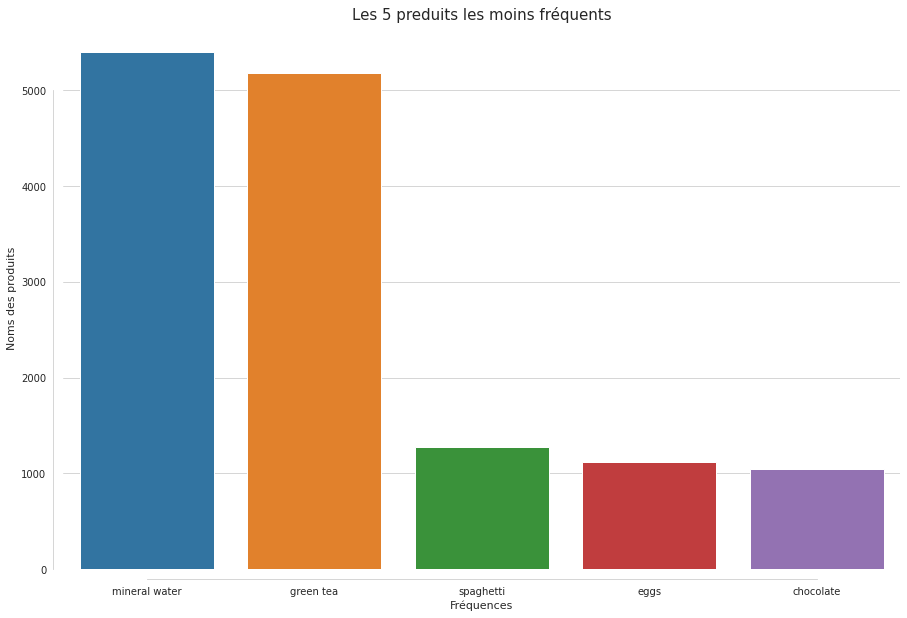

In [338]:
frequence_plot(pd.DataFrame(df.head(5)),title='Les 5 preduits les moins fréquents')

Cartographie les produits selon leur frequents au cours des transactions

In [335]:
def carte_plot(df, title='Carte map des produits selon leur frequences \n',size_plot=(15, 10), font_size=20):
  '''Cartographie les produits selon leur frequents au cours des transactions à l'aide Treemap de squarify'''

  import squarify
  import matplotlib.pyplot as plt
  import seaborn as sns

  f, ax = plt.subplots(figsize =size_plot)
  sns.set_style(style="whitegrid")
  sizes=df['frequences']
  label=df['items']
  squarify.plot(sizes=sizes, 
                label=label, 
                alpha=0.8,
                color=sns.color_palette("Spectral", 
                                      len(df)),
                pad=1,
                text_kwargs={'fontsize': int(font_size-20/100*font_size)}
                )
  ax.set_title(title, fontsize=font_size)

  plt.axis('off')
  return plt.show()

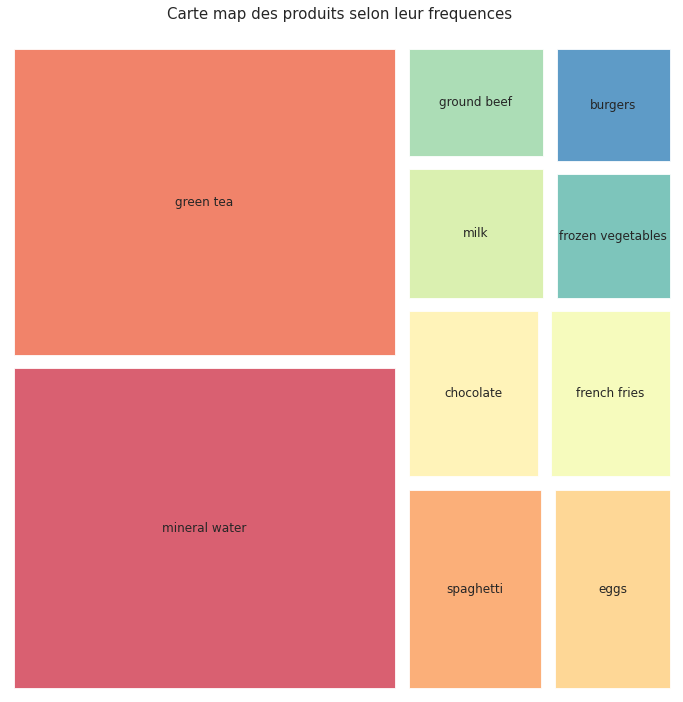

In [339]:
carte_plot(df.head(10), size_plot=(12,12),font_size=15)

Topologie de réseau 

In [410]:

def network_plot(df, title='Topologie Réseau des articles \n',size_plot=(15, 10), font_size=20):
  ''''permetre de génerer des topologies de réseau dans le but de voir la rélation en les Noeuds (entiers) et les arretes (catégorique) en implémentant notre stucture de données hiéarchisé qui est le dataframe frequence
      dépendance :
      pip install networkx 
  '''
  
  import networkx as nx

  f, ax = plt.subplots(figsize =size_plot)
  G = nx.from_pandas_edgelist(df, 'items', 'frequences')
  colors=[
          '#C3F8FF',
          '#ABD9FF',
          '#FFF6BF',
          '#FFEBAD',
          ]
  color_map = []
  for node in G:
      if node in list(df.frequences):
        color_map.append(colors[0])
      else: 
          color_map.append(colors[2])      
  nx.draw(G, 
          node_color=color_map, 
          with_labels=True, 
          font_size=int(font_size-30/100*font_size),
          font_color='b',
          node_size=500,
          arrowsize = 100,
          )
  
  ax.set_title(title, fontsize=font_size)
  return plt.show()

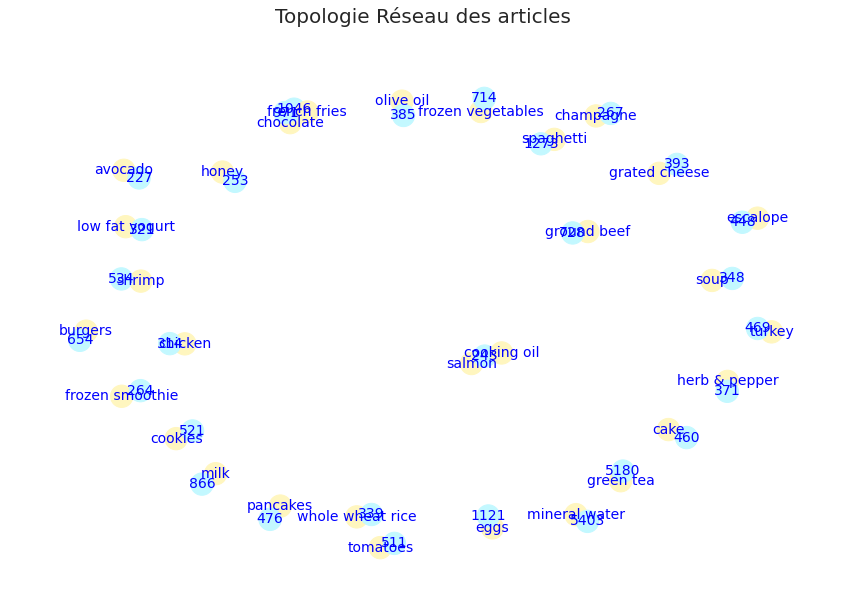

In [411]:
network_plot(df.head(30))

# Algorithm Association Rules

Support Score 

In [419]:
def Support_Score(dataframe, min_supp=0.6):
  ''''
  Sélections des ensembles d'éléments (itemsets) avec un minimum de support.
  Utilise l'algorithm apriori qui retourne par défaut l'indice de la colone du dataframe (item). le paramètre use_colnames=True permet de remplacer les indice par leu noms ou items
  '''
  from mlxtend.frequent_patterns import apriori

  return apriori(dataframe, min_support=min_supp, use_colnames=True)

In [428]:
matrice_support = Support_Score(df_prepare, min_supp=0.16)

In [429]:
matrice_support

,support,itemsets
0,0.690667,(green tea)
1,0.720400,(mineral water)
2,0.169733,(spaghetti)
3,0.591200,"(green tea, mineral water)"


confidence score

In [427]:
def Confidence_Score(matrice_support, threshold=0.7):
  '''
     Confidence Code

    Si nous voulons extraire des règles basées sur d'autres métriques comme la confidence, 
    nous pouvons utiliser association_rules de la bibliothèque mlxtend.frequent_patterns.

    associent des itemsets avec un niveau de confidence supérieur min_threshold
  '''

  from mlxtend.frequent_patterns import association_rules 

  return association_rules(matrice_support,metric="confidence",min_threshold=threshold)

In [430]:
matrice_confiance = Confidence_Score(matrice_support)

In [431]:
matrice_confiance

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(green tea),(mineral water),0.690667,0.720400,0.5912,0.855985,1.188207,0.093644,1.941458
1,(mineral water),(green tea),0.720400,0.690667,0.5912,0.820655,1.188207,0.093644,1.724797


In [436]:
def Lift_Score(matrice_support, threshold=0.25):
  '''
     Association basée sur l'ascenseur: association_rules avec metric = lift
  '''

  from mlxtend.frequent_patterns import association_rules 

  return association_rules(matrice_support,metric="lift",min_threshold=threshold)


In [437]:
matrice_lift = Lift_Score(matrice_support)

In [440]:
matrice_lift

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(green tea),(mineral water),0.690667,0.720400,0.5912,0.855985,1.188207,0.093644,1.941458
1,(mineral water),(green tea),0.720400,0.690667,0.5912,0.820655,1.188207,0.093644,1.724797
